#### Installing necessary libraries 

In [27]:
# !pip install torch 

##### ------------------------------------------------------------------

####  importing librararies

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Comaparing original vs Synthetic data 

In [10]:
# Load original data
original_data = pd.read_csv('heart_attack_prediction_dataset.csv')
# Load synthetic data
synthetic_data = pd.read_csv('Synthetic CDHT.csv')

In [11]:
# Ensure original data is one-hot encoded if synthetic data is one-hot encoded
original_data = pd.get_dummies(original_data)

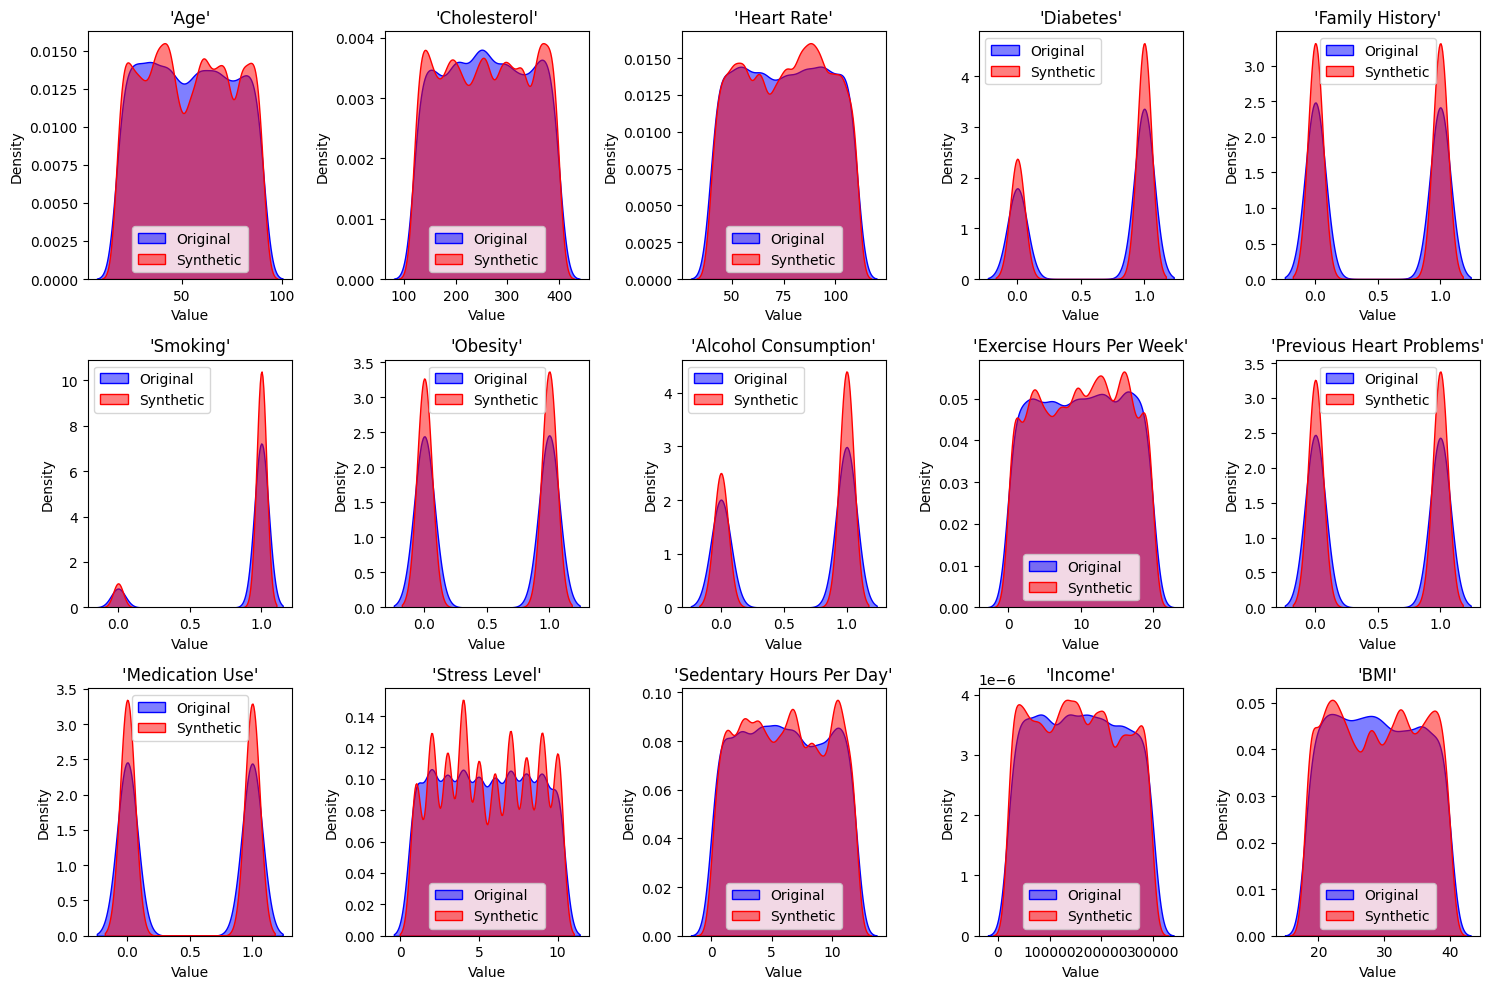

In [26]:
# Select a subset of features to visualize (e.g., first 15 features)
features_to_plot = original_data.columns[:15]  # Adjust number as needed
# Define the grid layout (3 rows, 5 columns for 15 features)
n_rows = 3
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust overall figure size as needed
# Flatten the axes array for easy indexing
axes = axes.flatten()
# Plot each feature in a subplot
for i, feature in enumerate(features_to_plot):
    sns.kdeplot(original_data[feature], label='Original', color='blue', fill=True, alpha=0.5, ax=axes[i])
    sns.kdeplot(synthetic_data[feature], label='Synthetic', color='red', fill=True, alpha=0.5, ax=axes[i])    
    # Set title and labels for each subplot
    axes[i].set_title(f"'{feature}'")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")
    axes[i].legend()
# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------- 

##### Data preprocessing 

In [ ]:
# Load and preprocess your dataset
CDHT_NEW = pd.read_csv('CDHT_with_HT_CD_features.csv')

# Ensure all non-numeric columns are encoded
CDHT_NEW = pd.get_dummies(CDHT_NEW)

# Fill any NaN values with 0 (or another appropriate value for your dataset)
CDHT_NEW = CDHT_NEW.fillna(0)

# Reduce dimensions with PCA
pca = PCA(n_components=100)  # Adjust this value based on memory and processing power
CDHT_NEW = pca.fit_transform(CDHT_NEW).astype(np.float32)


### Follwoing  code defines and trains a GAN with a generator to create synthetic data from random noise and a discriminator to distinguish real from fake data,
### optimizing both via adversarial training. After training, the generator produces synthetic data similar to the original dataset.

In [29]:
# Define the GAN parameters
#latent_dim = 100  # Dimension of the noise vector
#data_dim = CDHT_NEW.shape[1]  # Number of features after PCA
#batch_size = 64
#epochs = 10000
#lr = 0.0002  # Learning rate

# Generator Model
#class Generator(nn.Module):
    #def __init__(self, input_dim, output_dim):
       # super(Generator, self).__init__()
       # self.model = nn.Sequential(
        #    nn.Linear(input_dim, 128),
       #     nn.ReLU(),
      #      nn.Linear(128, 256),
     #       nn.ReLU(),
    #        nn.Linear(256, output_dim)
   #     )
        
  #  def forward(self, x):
 #       return self.model(x)

# Discriminator Model
#class Discriminator(nn.Module):
    #def __init__(self, input_dim):
        #super(Discriminator, self).__init__()
        #self.model = nn.Sequential(
         #   nn.Linear(input_dim, 256),
        #    nn.LeakyReLU(0.2),
       #     nn.Linear(256, 128),
      #      nn.LeakyReLU(0.2),
     #       nn.Linear(128, 1),
    #        nn.Sigmoid()
   #     )
        
  #  def forward(self, x):
 #       return self.model(x)

# Initialize the Generator and Discriminator
#generator = Generator(latent_dim, data_dim)
#discriminator = Discriminator(data_dim)

# Loss and Optimizers
#criterion = nn.BCELoss()
#optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr)
#optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr)

# Training Loop
#for epoch in range(epochs):
    # Train Discriminator
    #real_data = torch.tensor(CDHT_NEW[np.random.randint(0, CDHT_NEW.shape[0], batch_size)], dtype=torch.float32)
    #real_labels = torch.ones((batch_size, 1))

    #noise = torch.randn(batch_size, latent_dim)
    #fake_data = generator(noise)
    #fake_labels = torch.zeros((batch_size, 1))

    #optimizer_D.zero_grad()
    #real_loss = criterion(discriminator(real_data), real_labels)
    #fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
    #d_loss = real_loss + fake_loss
    #d_loss.backward()
    #optimizer_D.step()

    # Train Generator
    #optimizer_G.zero_grad()
    #fake_data = generator(noise)
    #g_loss = criterion(discriminator(fake_data), real_labels)  # Use real labels to "fool" the discriminator
    #g_loss.backward()
   # optimizer_G.step()

  #  if epoch % 1000 == 0:
 #       print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

#print("Training complete.")

# Generate Synthetic Data
#noise = torch.randn(40000, latent_dim)  # Generate 40,000 samples
#synthetic_data1 = generator(noise).detach().numpy()


##### Do not remove  below codes comments it will update old csv file with new one and lead to fails the  accuracy or model might beacause  every time it will genrate new data. it will work on older version of synthetic data 

In [9]:
# Convert to DataFrame and Save to CSV
#synthetic_data_df = pd.DataFrame(synthetic_data1, columns=[f'feature_{i}' for i in range(data_dim)])
#synthetic_data_df.to_csv('Synthetic CDHT1.csv', index=False)
#print("Synthetic data generated and saved to 'Synthetic CDHT.csv'")